# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Inference

# Data Exploration

In [1]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_csv('D:\\1 Research Project\\Paper on FRP\\Dataset for code\\T Beams Data_code_Corrected 1.3.csv')
df.head()



,ID,b,d,Tf,a/d,fc,Ast,Asv,Sw,n*tf,...,efu,Scheme,Z,B,Vf,dV,Vexp,Type,Afrp,dfrp
0,S0-EB,152,350,102,3.0,28.0,3.75,0.00,260.0,0.38,...,0.013,UW,90,1.570796,39.0,46.4,123.05,CFRP,0.76,273.6
1,S0-LS,152,350,102,3.0,28.0,3.75,0.00,260.0,1.40,...,0.019,UW,90,1.570796,12.0,14.3,95.92,CFRP,56.00,273.6
2,S0-LS-Rope,152,350,102,3.0,28.0,3.75,0.00,260.0,1.40,...,0.019,UWA,90,1.570796,80.0,95.2,164.03,CFRP,56.00,273.6
3,S1-EB,152,350,102,3.0,28.0,3.75,0.25,260.0,0.38,...,0.013,UW,90,1.570796,27.0,14.4,214.50,CFRP,0.76,273.6
4,S1-LS,152,350,102,3.0,28.0,3.75,0.25,260.0,1.40,...,0.019,UW,90,1.570796,15.0,8.0,202.50,CFRP,56.00,273.6


In [3]:
df['Vexp'].value_counts()

121.66    2
119.97    2
280.60    2
252.86    2
104.08    2
         ..
198.58    1
120.03    1
116.00    1
65.00     1
276.75    1
Name: Vexp, Length: 239, dtype: int64

In [4]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df= df[['b']+['d']+['hFRP']+['Ef']+['efu']+['Asv']+['fc']+['n*tf']+['Vexp']+['ffu']+['Scheme']+['Type']]

df["Type"] = df["Type"].astype('category')
df['Type']=df['Type'].cat.codes
df["Type"]=df["Type"].astype('float')


df["Scheme"] = df["Scheme"].astype('category')
df['Scheme']=df['Scheme'].cat.codes
df["Scheme"]=df["Scheme"].astype('float')


df['b'] = np.log(df['b'])
df['d'] = np.log(df['d'])
df['hFRP'] = np.log(df['hFRP'])
df['Ef'] = np.log(df['Ef'])
df['efu'] = np.log(df['efu'])
df['Asv'] = np.log(df['Asv'])
df['fc'] = np.log(np.sqrt(df['fc']))
df['n*tf'] = np.log(df['n*tf'])
df['Vexp'] = np.log(df['Vexp'])
df['ffu'] = np.log(df['ffu'])


df['Type'] = np.log(df['Type'])
df=df.round(decimals=2)

df.to_csv('test.csv')

df.head()



<ipython-input-4-313a88b9a59c>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,b,d,hFRP,Ef,efu,Asv,fc,n*tf,Vexp,ffu,Scheme,Type
0,5.02,5.86,5.72,4.17,-4.34,-inf,1.67,-0.97,4.81,6.80,3.0,0.0
1,5.02,5.86,5.72,4.79,-3.96,-inf,1.67,0.34,4.56,7.72,3.0,0.0
2,5.02,5.86,5.72,4.79,-3.96,-inf,1.67,0.34,5.10,7.72,4.0,0.0
3,5.02,5.86,5.72,4.17,-4.34,-1.39,1.67,-0.97,5.37,6.80,3.0,0.0
4,5.02,5.86,5.72,4.79,-3.96,-1.39,1.67,0.34,5.31,7.72,3.0,0.0


In [5]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())

data=df
X = data.loc[:, data.columns != 'Vexp']
y=data['Vexp']
X.head()

,b,d,hFRP,Ef,efu,Asv,fc,n*tf,ffu,Scheme,Type
0,5.02,5.86,5.72,4.17,-4.34,-1.490457,1.67,-0.97,6.80,3.0,0.0
1,5.02,5.86,5.72,4.79,-3.96,-1.490457,1.67,0.34,7.72,3.0,0.0
2,5.02,5.86,5.72,4.79,-3.96,-1.490457,1.67,0.34,7.72,4.0,0.0
3,5.02,5.86,5.72,4.17,-4.34,-1.390000,1.67,-0.97,6.80,3.0,0.0
4,5.02,5.86,5.72,4.79,-3.96,-1.390000,1.67,0.34,7.72,3.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       263 non-null    float64
 1   d       263 non-null    float64
 2   hFRP    263 non-null    float64
 3   Ef      263 non-null    float64
 4   efu     263 non-null    float64
 5   Asv     263 non-null    float64
 6   fc      263 non-null    float64
 7   n*tf    263 non-null    float64
 8   Vexp    263 non-null    float64
 9   ffu     263 non-null    float64
 10  Scheme  263 non-null    float64
 11  Type    263 non-null    float64
dtypes: float64(12)
memory usage: 24.8 KB


In [6]:
y.head()

0    4.81
1    4.56
2    5.10
3    5.37
4    5.31
Name: Vexp, dtype: float64

In [7]:
print(data.shape)

(251, 12)


# Checking the data types, If string exists it should be converted into numerical values

In [8]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RMSE(train)':[],
                           'R-squared (train)':[],
                           'Adj R-squared (train)':[],
                           'MAE (train)':[],
                           'RMSE (test)':[],
                           'R-squared (test)':[],
                           'Adj R-squared (test)':[],
                           'MAE(test)':[],
                           '10-Fold Cross Validation':[]})

evaluation2 = pd.DataFrame({'Model': [],
                           'Test':[],
                           '1':[],
                           '2':[],
                           '3':[],
                           '4':[],
                           '5':[],
                           '6':[],
                           '7':[],
                           '8':[],
                           '9':[],
                           '10':[],
                           'Mean':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)


features = list(data.columns.values)
print(features)
features=  ['b','d','wf','hFRP','Ef','efu','Asv', 'fc', 'n*tf', 'Vexp', 'ffu', 'Scheme', 'Type']
features2=   ['b','d','wf','hFRP','Ef','efu','Asv', 'fc', 'n*tf','ffu', 'Scheme', 'Type']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


['b', 'd', 'hFRP', 'Ef', 'efu', 'Asv', 'fc', 'n*tf', 'Vexp', 'ffu', 'Scheme', 'Type']


In [9]:
convert_dict = {'ID': float}

In [10]:
y = df["Vexp"]
X = df.drop(["Vexp"],axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X),  index=X.index, columns=X.columns)

y = pd.DataFrame(df ['Vexp'])
y_scaled=scaler.fit_transform(y)
y_scaled = pd.DataFrame(y_scaled,index=y.index, columns=y.columns )
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)


In [12]:
df.iloc[X_train.index].to_csv("train_dataset.csv")

In [13]:
df.iloc[X_test.index].to_csv("test_dataset.csv")

## Linear Regression

Spliiting the data into training and test set


In [11]:
print("for linear Regression")
complex_model_1 = linear_model.LinearRegression(normalize=True)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['Linear Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['Linear Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['Linear Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['Linear Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['Linear Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['Linear Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['Linear Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['Linear Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]



print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

for linear Regression
Model    Linear Regression
Test     Train RMSE       
1       -0.342            
2       -0.366            
3       -0.422            
4       -0.329            
5       -0.361            
6       -0.32             
7       -0.434            
8       -0.399            
9       -0.363            
10      -0.397            
Mean    -0.373            
Name: 0, dtype: object
Model    Linear Regression
Test     Train R2         
1        0.667            
2        0.479            
3        0.362            
4        0.679            
5        0.161            
6        0.638            
7        0.546            
8        0.49             
9        0.432            
10       0.551            
Mean     0.5              
Name: 1, dtype: object
Model    Linear Regression
Test     Train ar2        
1        0.645            
2        0.445            
3        0.321            
4        0.659            
5        0.107            
6        0.614            
7        0.517

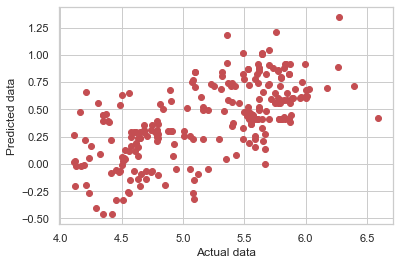

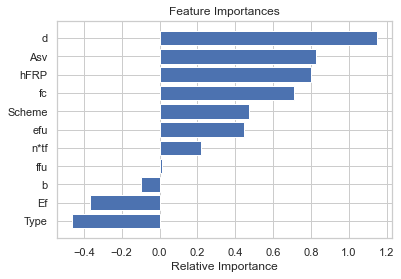

[-0.10024551  1.1480432   0.79990341 -0.36596633  0.44889077  0.8248297
  0.71200752  0.2198856   0.01049179  0.47035557 -0.46050372]
Intercept: 3.2467862022627907
Coefficients: [-0.10024551  1.1480432   0.79990341 -0.36596633  0.44889077  0.8248297
  0.71200752  0.2198856   0.01049179  0.47035557 -0.46050372]


In [12]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('MLR_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('MLR_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('MLR_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('MLR_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('MLR_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

K=X

features = list(X.columns.values)
importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

## Ridge Regression

In [13]:
print("For ridge regression")
complex_model_1 = linear_model.Ridge(alpha=0.02, random_state=100, normalize=False, fit_intercept= bool)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['ridge Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['ridge Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ridge Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ridge Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ridge Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ridge Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ridge Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ridge Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ridge Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]
print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

For ridge regression
Model    ridge Regression
Test     Train RMSE      
1       -0.341           
2       -0.366           
3       -0.422           
4       -0.329           
5       -0.361           
6       -0.319           
7       -0.435           
8       -0.398           
9       -0.362           
10      -0.396           
Mean    -0.373           
Name: 8, dtype: object
Model    ridge Regression
Test     Train R2        
1        0.669           
2        0.479           
3        0.364           
4        0.68            
5        0.163           
6        0.639           
7        0.545           
8        0.494           
9        0.436           
10       0.554           
Mean     0.502           
Name: 9, dtype: object
Model    ridge Regression
Test     Train ar2       
1        0.651           
2        0.451           
3        0.33            
4        0.663           
5        0.118           
6        0.619           
7        0.52            
8        0.468         

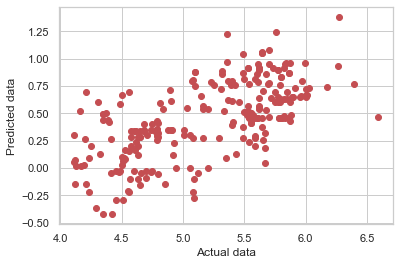

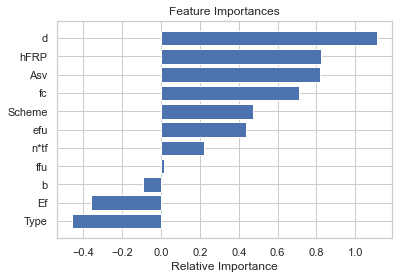

[-0.09174863  1.1104536   0.82468366 -0.36053137  0.4379982   0.81896565
  0.71052105  0.22156333  0.01493348  0.47083367 -0.45598946]
Intercept: 3.2499864809647594
Coefficients: [-0.09174863  1.1104536   0.82468366 -0.36053137  0.4379982   0.81896565
  0.71052105  0.22156333  0.01493348  0.47083367 -0.45598946]


In [14]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('Ridge_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('Ridge_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Ridge_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('Ridge_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Ridge_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

## Lasso Regression

In [15]:
complex_model_1 = linear_model.Lasso(alpha= 0.0001)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['LASSO Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['LASSO Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['LASSO Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['LASSO Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['LASSO Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['LASSO Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['LASSO Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['LASSO Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['LASSO Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

Model    LASSO Regression
Test     Train RMSE      
1       -0.341           
2       -0.366           
3       -0.422           
4       -0.33            
5       -0.36            
6       -0.32            
7       -0.435           
8       -0.398           
9       -0.363           
10      -0.397           
Mean    -0.373           
Name: 16, dtype: object
Model    LASSO Regression
Test     Train R2        
1        0.668           
2        0.478           
3        0.363           
4        0.679           
5        0.163           
6        0.637           
7        0.544           
8        0.492           
9        0.433           
10       0.551           
Mean     0.501           
Name: 17, dtype: object
Model    LASSO Regression
Test     Train ar2       
1        0.651           
2        0.45            
3        0.329           
4        0.662           
5        0.119           
6        0.618           
7        0.52            
8        0.465           
9        0.403  

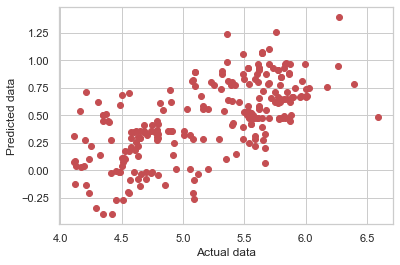

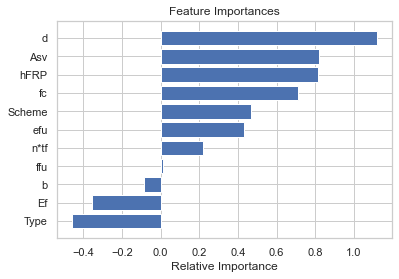

[-0.08525926  1.11790523  0.81439305 -0.35604177  0.43319816  0.82000578
  0.70976402  0.22113521  0.01116825  0.46880919 -0.45530761]
Intercept: 3.253150192516397
Coefficients: [-0.08525926  1.11790523  0.81439305 -0.35604177  0.43319816  0.82000578
  0.70976402  0.22113521  0.01116825  0.46880919 -0.45530761]


In [16]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('Lasso_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('Lasso_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('Lasso_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('Lasso_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('Lasso_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('Lasso_entire_actual.csv', y, delimiter=',', fmt='%s')


import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.coef_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

#equation for Linear Regression
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

## K- nearest Neighbors

In [21]:
complex_model_1 = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['kNN Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['kNN Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['kNN Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['kNN Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['kNN Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['kNN Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['kNN Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['kNN Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['kNN Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

Model    kNN Regression
Test     Train RMSE    
1       -0.263         
2       -0.242         
3       -0.376         
4       -0.383         
5       -0.312         
6       -0.235         
7       -0.369         
8       -0.244         
9       -0.243         
10      -0.392         
Mean    -0.306         
Name: 48, dtype: object
Model    kNN Regression
Test     Train R2      
1        0.802         
2        0.772         
3        0.494         
4        0.566         
5        0.372         
6        0.804         
7        0.672         
8        0.809         
9        0.746         
10       0.563         
Mean     0.66          
Name: 49, dtype: object
Model    kNN Regression
Test     Train ar2     
1        0.792         
2        0.759         
3        0.467         
4        0.543         
5        0.339         
6        0.793         
7        0.655         
8        0.799         
9        0.732         
10       0.54          
Mean     0.642         
Name: 50, dtype:

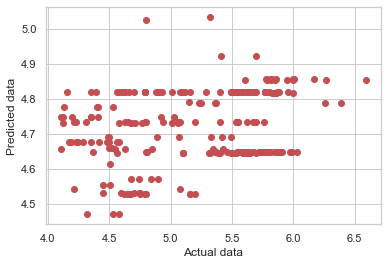

In [22]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('KNN_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('KNN_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('KNN_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('KNN_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('KNN_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('KNN_entire_actual.csv', y, delimiter=',', fmt='%s')



import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()




## Support Vector Regression

In [28]:
print("For SVR: ")
from sklearn.svm import SVR
complex_model_1 = SVR(kernel='rbf', C=4, degree=1)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['SVR Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['SVR','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['SVR','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['SVR','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['SVR','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['SVR','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['SVR','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['SVR','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['SVR','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

For SVR: 
Model    SVR       
Test     Train RMSE
1       -0.202     
2       -0.244     
3       -0.344     
4       -0.291     
5       -0.289     
6       -0.275     
7       -0.35      
8       -0.285     
9       -0.36      
10      -0.309     
Mean    -0.295     
Name: 80, dtype: object
Model    SVR     
Test     Train R2
1        0.884   
2        0.768   
3        0.578   
4        0.75    
5        0.463   
6        0.731   
7        0.704   
8        0.74    
9        0.441   
10       0.728   
Mean     0.679   
Name: 81, dtype: object
Model    SVR      
Test     Train ar2
1        0.878    
2        0.756    
3        0.555    
4        0.737    
5        0.434    
6        0.717    
7        0.689    
8        0.726    
9        0.411    
10       0.714    
Mean     0.662    
Name: 82, dtype: object
Model    SVR      
Test     Train mae
1       -0.142    
2       -0.167    
3       -0.239    
4       -0.224    
5       -0.209    
6       -0.152    
7       -0.224    
8     

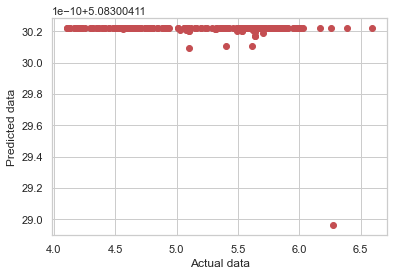

In [27]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('SVR_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('SVR_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('SVR_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('SVR_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('SVR_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('SVR_entire_actual.csv', y, delimiter=',', fmt='%s')



import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()




## Decision Tree Regression

In [29]:
print("For Decision Tree regression")
from sklearn.tree import DecisionTreeRegressor
complex_model_1 = DecisionTreeRegressor(random_state=45)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['DT','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['DT','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['DT','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['DT','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['DT','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['DT','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['DT','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['DT','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['DT','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

For Decision Tree regression
Model    DT        
Test     Train RMSE
1       -0.288     
2       -0.217     
3       -0.233     
4       -0.362     
5       -0.21      
6       -0.314     
7       -0.244     
8       -0.104     
9       -0.431     
10      -0.375     
Mean    -0.278     
Name: 88, dtype: object
Model    DT      
Test     Train R2
1        0.765   
2        0.816   
3        0.806   
4        0.614   
5        0.717   
6        0.65    
7        0.856   
8        0.965   
9        0.197   
10       0.601   
Mean     0.699   
Name: 89, dtype: object
Model    DT       
Test     Train ar2
1        0.752    
2        0.807    
3        0.796    
4        0.593    
5        0.702    
6        0.632    
7        0.849    
8        0.964    
9        0.155    
10       0.58     
Mean     0.683    
Name: 90, dtype: object
Model    DT       
Test     Train mae
1       -0.167    
2       -0.125    
3       -0.145    
4       -0.237    
5       -0.149    
6       -0.16     
7     

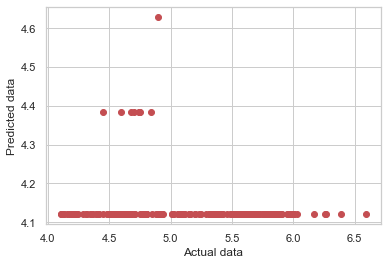

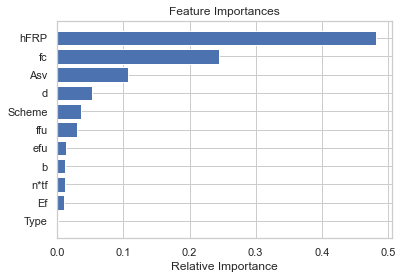

[0.01188416 0.05280354 0.48200552 0.01081785 0.01305572 0.10719472
 0.24440234 0.01131141 0.02947659 0.03634729 0.00070086]


In [30]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('DT_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('DT_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('DT_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('DT_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('DT_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

## Random Forest Regression

In [31]:
print("For Random Forest regression")
from sklearn.ensemble import RandomForestRegressor
complex_model_1 = RandomForestRegressor(random_state=500, n_estimators=400)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['RF','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['RF','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['RF','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['RF','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['RF','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['RF','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['RF','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['RF','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['RF','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

For Random Forest regression
Model    RF        
Test     Train RMSE
1       -0.174     
2       -0.133     
3       -0.203     
4       -0.282     
5       -0.177     
6       -0.18      
7       -0.268     
8       -0.166     
9       -0.216     
10      -0.343     
Mean    -0.214     
Name: 96, dtype: object
Model    RF      
Test     Train R2
1        0.914   
2        0.932   
3        0.852   
4        0.764   
5        0.797   
6        0.885   
7        0.827   
8        0.911   
9        0.798   
10       0.665   
Mean     0.835   
Name: 97, dtype: object
Model    RF       
Test     Train ar2
1        0.91     
2        0.928    
3        0.845    
4        0.752    
5        0.787    
6        0.879    
7        0.818    
8        0.907    
9        0.787    
10       0.647    
Mean     0.826    
Name: 98, dtype: object
Model    RF       
Test     Train mae
1       -0.115    
2       -0.099    
3       -0.136    
4       -0.187    
5       -0.13     
6       -0.118    
7     

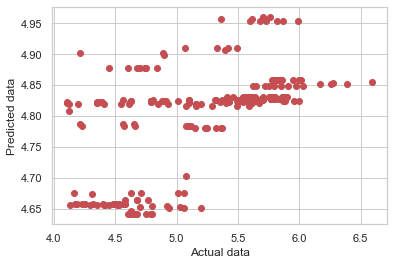

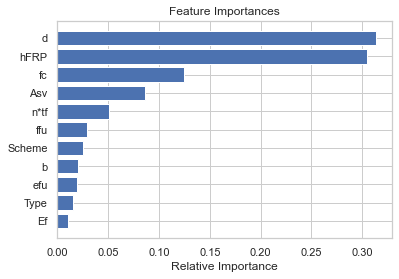

[0.02024587 0.31347512 0.30466382 0.01037361 0.01969363 0.0862618
 0.12509156 0.05069168 0.02933533 0.02498025 0.01518733]


In [32]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('RF_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('RF_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('RF_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('RF_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('RF_entire_actual.csv', y, delimiter=',', fmt='%s')


import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)


For permutation feature importance for Random Forest

In [34]:
RF_model=complex_model_1
from sklearn.inspection import permutation_importance
r = permutation_importance(RF_model, X_test, y_test,n_repeats=50,random_state=0)
#if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
for i in r.importances_mean.argsort()[::-1]:
  print(f"{features[i]:<20}"
  f"{r.importances_mean[i]:.3f}"
  f" +/- {r.importances_std[i]:.3f}")

hFRP                0.711 +/- 0.138
b                   0.259 +/- 0.042
Asv                 0.089 +/- 0.019
d                   0.047 +/- 0.008
fc                  0.023 +/- 0.007
Scheme              0.008 +/- 0.002
n*tf                0.005 +/- 0.002
Ef                  0.004 +/- 0.001
ffu                 0.003 +/- 0.001
efu                 0.002 +/- 0.001
Type                0.000 +/- 0.000


For genarating tree for Random Forest

In [36]:

# Extract single tree
estimator = RF_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features2,
                class_names = features2,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

ValueError: Length of feature_names, 12 does not match number of features, 11

In [ ]:


# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(100, 510, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}


# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

# rf_random.best_params_


## Random Forest with Optimal Parameter

In [37]:
features = list(X.columns.values)

importances = RF_model_opt.feature_importances_
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'RF_model_opt' is not defined

In [22]:
importances

array([ 1.18052023, -1.47858666,  3.79408346, -0.4235083 , -0.15159803,
        1.23333284,  0.77678394,  0.10222574,  0.06943345,  0.73558519,
       -0.32752217])

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## XG Boost Regression

In [33]:
print("For XGBoost regression")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from xgboost import plot_importance
complex_model_1 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, gamma=0, subsample=0.5,
                           colsample_bytree=1, max_depth=2)

complex_model_1.fit(X_train, y_train)
testing=pd.read_csv('D:\\1 Research Project\\Paper on FRP\\Dataset for code\\T Beams Data_code_Corrected 1.1.csv');
pred2=complex_model_1.predict(X_test)



pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBOOST Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['XGBOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['XGBOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['XGBOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['XGBOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['XGBOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['XGBOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['XGBOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['XGBOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])


print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

For XGBoost regression
Model    XGBOOST Regression
Test     Train RMSE        
1       -0.152             
2       -0.146             
3       -0.216             
4       -0.228             
5       -0.244             
6       -0.205             
7       -0.28              
8       -0.196             
9       -0.293             
10      -0.317             
Mean    -0.228             
Name: 104, dtype: object
Model    XGBOOST Regression
Test     Train R2          
1        0.934             
2        0.917             
3        0.834             
4        0.846             
5        0.618             
6        0.851             
7        0.811             
8        0.877             
9        0.629             
10       0.714             
Mean     0.803             
Name: 105, dtype: object
Model    XGBOOST Regression
Test     Train ar2         
1        0.931             
2        0.913             
3        0.825             
4        0.838             
5        0.598             
6  

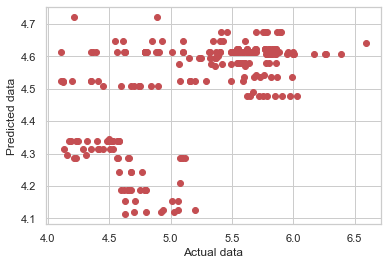

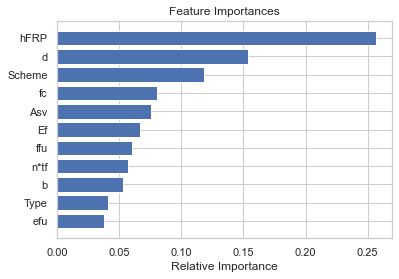

[0.05300982 0.15368995 0.25673878 0.06669287 0.03756813 0.07545709
 0.08008605 0.0573775  0.06032641 0.11820681 0.04084662]


In [34]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('XgBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('XgBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('XgBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)


### Optimal parameter for XGBOOST

## ADABOOST REGRESSION

In [35]:
from sklearn.ensemble import AdaBoostRegressor
print("For Adaboost regression")
complex_model_1 = AdaBoostRegressor(random_state=30, n_estimators=50)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['ADABOOST Regression','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['ADABOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ADABOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ADABOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ADABOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ADABOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ADABOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ADABOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ADABOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

For Adaboost regression
Model    ADABOOST Regression
Test     Train RMSE         
1       -0.245              
2       -0.231              
3       -0.225              
4       -0.289              
5       -0.256              
6       -0.222              
7       -0.327              
8       -0.271              
9       -0.279              
10      -0.336              
Mean    -0.268              
Name: 112, dtype: object
Model    ADABOOST Regression
Test     Train R2           
1        0.829              
2        0.793              
3        0.819              
4        0.753              
5        0.579              
6        0.825              
7        0.742              
8        0.764              
9        0.664              
10       0.679              
Mean     0.745              
Name: 113, dtype: object
Model    ADABOOST Regression
Test     Train ar2          
1        0.82               
2        0.782              
3        0.809              
4        0.739             

In [ ]:
# # Print the predicted and actual value for the test set
# AD_y_test_prediction= ADB_model.predict(X_test)
# np.savetxt('AD_test_prediction.csv', AD_y_test_prediction, delimiter=',', fmt='%s')
# np.savetxt('AD_test_actual.csv', y_test, delimiter=',', fmt='%s')

# # Print the predicted and actual value for the traing set
# AD_y_train_prediction= ADB_model.predict(X_train)
# np.savetxt('AD_train_prediction.csv', AD_y_train_prediction, delimiter=',', fmt='%s')
# np.savetxt('AD_train_actual.csv', y_train, delimiter=',', fmt='%s')

# X_standardized = scaler.transform(X)
# AD_y_pred_entire_data = ADB_model.predict(X_standardized)

# np.savetxt('AD_entire_prediction.csv', AD_y_pred_entire_data, delimiter=',', fmt='%s')
# np.savetxt('AD_entire_actual.csv', y, delimiter=',', fmt='%s')

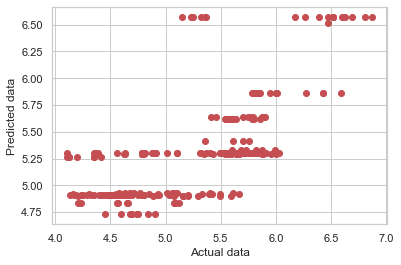

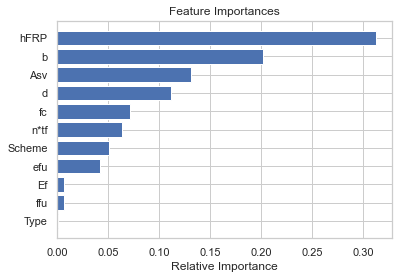

[2.02104690e-01 1.11340351e-01 3.12989458e-01 6.86762641e-03
 4.23447800e-02 1.31515531e-01 7.17909773e-02 6.33390500e-02
 6.66381830e-03 5.07376879e-02 3.06029175e-04]


In [28]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('AdaBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('AdaBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('AdaBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('AdaBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('AdaBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('AdaBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)

## CAT BOOST REGRESSION

In [ ]:
# !pip3 install catboost
# from catboost import CatBoostRegressor
# CB_model = CatBoostRegressor(iterations=700,learning_rate=0.02,depth=12,eval_metric='RMSE',random_seed = 23,bagging_temperature = 0.2,od_type='Iter',
#                              metric_period = 75,
#                              od_wait=100)

# CB_model.fit(X_train, y_train)

# pred = CB_model.predict(X_test)
# rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
# rtrcm = float(format(CB_model.score(X_train, y_train),'.3f'))
# artrcm = float(format(adjustedR2(CB_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
# rtecm = float(format(CB_model.score(X_test, y_test),'.3f'))
# artecm = float(format(adjustedR2(CB_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
# cv = float(format(cross_val_score(CB_model,X_train, y_train,cv=10).mean(),'.3f'))

# r = evaluation.shape[0]
# evaluation.loc[r] = ['CatBoost','All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
# evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)


In [31]:
print("For CatBoost regression")
!pip3 install catboost
from catboost import CatBoostRegressor
complex_model_1 = CatBoostRegressor(iterations=700,learning_rate=0.02,depth=5,eval_metric='RMSE',random_seed = 23,bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

complex_model_1.fit(X_train, y_train)


# pred = complex_model_1.predict(X_test)
# rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
# r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
# ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
# mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

# rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
# r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
# ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
# mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

# cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

# cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
# cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

# cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
# cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

# cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
# cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

# cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
# cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

# cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
# cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

# cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
# cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

# cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
# cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

# cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
# cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

# r = evaluation.shape[0]
# evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
# evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

# r = evaluation2.shape[0]
# evaluation2.loc[r] = ['CATBOOST','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
# evaluation2.loc[r+1] = ['CATBOOST','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
# evaluation2.loc[r+2] = ['CATBOOST','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
# evaluation2.loc[r+3] = ['CATBOOST','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
# evaluation2.loc[r+4] = ['CATBOOST','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
# evaluation2.loc[r+5] = ['CATBOOST','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
# evaluation2.loc[r+6] = ['CATBOOST','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
# evaluation2.loc[r+7] = ['CATBOOST','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


For CatBoost regression
0:	learn: 0.7002986	total: 130ms	remaining: 1m 31s
75:	learn: 0.3791946	total: 171ms	remaining: 1.4s
150:	learn: 0.2644420	total: 209ms	remaining: 759ms
225:	learn: 0.2165941	total: 247ms	remaining: 518ms
300:	learn: 0.1876402	total: 284ms	remaining: 377ms
375:	learn: 0.1709268	total: 326ms	remaining: 281ms
450:	learn: 0.1565764	total: 364ms	remaining: 201ms
525:	learn: 0.1427930	total: 405ms	remaining: 134ms
600:	learn: 0.1320284	total: 444ms	remaining: 73.2ms
675:	learn: 0.1248964	total: 483ms	remaining: 17.1ms
699:	learn: 0.1224751	total: 495ms	remaining: 0us


In [29]:
from catboost import CatBoostRegressor
complex_model_1 = CatBoostRegressor(iterations=700,learning_rate=0.02,depth=5,eval_metric='RMSE',random_seed = 23,bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

complex_model_1.fit(X_train, y_train)
pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)
r = evaluation2.shape[0]
evaluation2.loc[r] = ['CATBOOST','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['CATBOOST','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['CATBOOST','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['CATBOOST','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['CATBOOST','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['CATBOOST','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['CATBOOST','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['CATBOOST','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

0:	learn: 0.6123421	total: 125ms	remaining: 1m 27s
75:	learn: 0.3521240	total: 162ms	remaining: 1.33s
150:	learn: 0.2666171	total: 196ms	remaining: 713ms
225:	learn: 0.2226975	total: 230ms	remaining: 482ms
300:	learn: 0.1953544	total: 263ms	remaining: 349ms
375:	learn: 0.1769417	total: 297ms	remaining: 256ms
450:	learn: 0.1613192	total: 333ms	remaining: 184ms
525:	learn: 0.1493015	total: 368ms	remaining: 122ms
600:	learn: 0.1410145	total: 402ms	remaining: 66.2ms
675:	learn: 0.1340181	total: 435ms	remaining: 15.5ms
699:	learn: 0.1325398	total: 446ms	remaining: 0us
0:	learn: 0.6195148	total: 1.22ms	remaining: 854ms
75:	learn: 0.3521144	total: 38.1ms	remaining: 313ms
150:	learn: 0.2621844	total: 70.9ms	remaining: 258ms
225:	learn: 0.2209339	total: 104ms	remaining: 218ms
300:	learn: 0.1924705	total: 137ms	remaining: 182ms
375:	learn: 0.1745007	total: 171ms	remaining: 147ms
450:	learn: 0.1596623	total: 209ms	remaining: 115ms
525:	learn: 0.1459981	total: 243ms	remaining: 80.4ms
600:	learn: 0

450:	learn: 0.1547868	total: 210ms	remaining: 116ms
525:	learn: 0.1426852	total: 245ms	remaining: 80.9ms
600:	learn: 0.1328710	total: 277ms	remaining: 45.6ms
675:	learn: 0.1256263	total: 309ms	remaining: 11ms
699:	learn: 0.1236654	total: 320ms	remaining: 0us
0:	learn: 0.6108888	total: 1.14ms	remaining: 794ms
75:	learn: 0.3472257	total: 40.4ms	remaining: 331ms
150:	learn: 0.2630685	total: 72.8ms	remaining: 265ms
225:	learn: 0.2225799	total: 105ms	remaining: 220ms
300:	learn: 0.1962609	total: 138ms	remaining: 183ms
375:	learn: 0.1788063	total: 171ms	remaining: 148ms
450:	learn: 0.1637962	total: 206ms	remaining: 114ms
525:	learn: 0.1504972	total: 239ms	remaining: 79.1ms
600:	learn: 0.1408120	total: 272ms	remaining: 44.8ms
675:	learn: 0.1337963	total: 305ms	remaining: 10.8ms
699:	learn: 0.1319498	total: 315ms	remaining: 0us
0:	learn: 0.6195935	total: 1.32ms	remaining: 926ms
75:	learn: 0.3587923	total: 38.5ms	remaining: 316ms
150:	learn: 0.2684222	total: 71ms	remaining: 258ms
225:	learn: 0.

0:	learn: 0.6154453	total: 1.19ms	remaining: 832ms
75:	learn: 0.3569728	total: 38.1ms	remaining: 313ms
150:	learn: 0.2679708	total: 70.9ms	remaining: 258ms
225:	learn: 0.2235767	total: 104ms	remaining: 217ms
300:	learn: 0.1943046	total: 136ms	remaining: 180ms
375:	learn: 0.1737271	total: 168ms	remaining: 145ms
450:	learn: 0.1591792	total: 203ms	remaining: 112ms
525:	learn: 0.1488270	total: 235ms	remaining: 77.8ms
600:	learn: 0.1405951	total: 268ms	remaining: 44.1ms
675:	learn: 0.1345503	total: 300ms	remaining: 10.7ms
699:	learn: 0.1329238	total: 312ms	remaining: 0us
0:	learn: 0.6174984	total: 1.27ms	remaining: 888ms
75:	learn: 0.3513926	total: 39.3ms	remaining: 322ms
150:	learn: 0.2662274	total: 72.5ms	remaining: 264ms
225:	learn: 0.2205602	total: 105ms	remaining: 220ms
300:	learn: 0.1944159	total: 138ms	remaining: 182ms
375:	learn: 0.1773190	total: 170ms	remaining: 146ms
450:	learn: 0.1635682	total: 203ms	remaining: 112ms
525:	learn: 0.1498084	total: 237ms	remaining: 78.3ms
600:	learn

450:	learn: 0.1683466	total: 208ms	remaining: 115ms
525:	learn: 0.1566918	total: 240ms	remaining: 79.5ms
600:	learn: 0.1457491	total: 273ms	remaining: 45ms
675:	learn: 0.1371411	total: 307ms	remaining: 10.9ms
699:	learn: 0.1350727	total: 317ms	remaining: 0us
0:	learn: 0.5994316	total: 1.23ms	remaining: 858ms
75:	learn: 0.3505871	total: 43.2ms	remaining: 355ms
150:	learn: 0.2687886	total: 76ms	remaining: 276ms
225:	learn: 0.2235029	total: 109ms	remaining: 229ms
300:	learn: 0.1931234	total: 142ms	remaining: 189ms
375:	learn: 0.1707001	total: 175ms	remaining: 151ms
450:	learn: 0.1547868	total: 208ms	remaining: 115ms
525:	learn: 0.1426852	total: 245ms	remaining: 81.1ms
600:	learn: 0.1328710	total: 278ms	remaining: 45.8ms
675:	learn: 0.1256263	total: 312ms	remaining: 11.1ms
699:	learn: 0.1236654	total: 323ms	remaining: 0us
0:	learn: 0.6108888	total: 762us	remaining: 533ms
75:	learn: 0.3472257	total: 35.3ms	remaining: 290ms
150:	learn: 0.2630685	total: 68.2ms	remaining: 248ms
225:	learn: 0.2

0:	learn: 0.6044071	total: 1.24ms	remaining: 866ms
75:	learn: 0.3500469	total: 39.8ms	remaining: 327ms
150:	learn: 0.2690460	total: 73.4ms	remaining: 267ms
225:	learn: 0.2272626	total: 106ms	remaining: 223ms
300:	learn: 0.2001122	total: 139ms	remaining: 185ms
375:	learn: 0.1812109	total: 173ms	remaining: 149ms
450:	learn: 0.1650304	total: 207ms	remaining: 114ms
525:	learn: 0.1535449	total: 241ms	remaining: 79.6ms
600:	learn: 0.1434923	total: 273ms	remaining: 45ms
675:	learn: 0.1366074	total: 306ms	remaining: 10.9ms
699:	learn: 0.1344955	total: 318ms	remaining: 0us
0:	learn: 0.6154453	total: 1.14ms	remaining: 800ms
75:	learn: 0.3569728	total: 37.5ms	remaining: 308ms
150:	learn: 0.2679708	total: 72.2ms	remaining: 263ms
225:	learn: 0.2235767	total: 105ms	remaining: 221ms
300:	learn: 0.1943046	total: 138ms	remaining: 183ms
375:	learn: 0.1737271	total: 171ms	remaining: 147ms
450:	learn: 0.1591792	total: 206ms	remaining: 114ms
525:	learn: 0.1488270	total: 240ms	remaining: 79.3ms
600:	learn: 

450:	learn: 0.1564184	total: 204ms	remaining: 113ms
525:	learn: 0.1440899	total: 238ms	remaining: 78.6ms
600:	learn: 0.1347390	total: 270ms	remaining: 44.5ms
675:	learn: 0.1285075	total: 303ms	remaining: 10.8ms
699:	learn: 0.1264228	total: 314ms	remaining: 0us
0:	learn: 0.6142020	total: 1.16ms	remaining: 811ms
75:	learn: 0.3551204	total: 38ms	remaining: 312ms
150:	learn: 0.2702419	total: 70.9ms	remaining: 258ms
225:	learn: 0.2295905	total: 104ms	remaining: 218ms
300:	learn: 0.2007263	total: 137ms	remaining: 181ms
375:	learn: 0.1801039	total: 170ms	remaining: 147ms
450:	learn: 0.1683466	total: 205ms	remaining: 113ms
525:	learn: 0.1566918	total: 238ms	remaining: 78.6ms
600:	learn: 0.1457491	total: 270ms	remaining: 44.5ms
675:	learn: 0.1371411	total: 303ms	remaining: 10.8ms
699:	learn: 0.1350727	total: 314ms	remaining: 0us
0:	learn: 0.5994316	total: 1.24ms	remaining: 865ms
75:	learn: 0.3505871	total: 38.6ms	remaining: 317ms
150:	learn: 0.2687886	total: 70.6ms	remaining: 257ms
225:	learn: 

0:	learn: 0.6043164	total: 1.21ms	remaining: 849ms
75:	learn: 0.3441578	total: 41.3ms	remaining: 339ms
150:	learn: 0.2562843	total: 74.8ms	remaining: 272ms
225:	learn: 0.2125279	total: 108ms	remaining: 227ms
300:	learn: 0.1829523	total: 141ms	remaining: 187ms
375:	learn: 0.1622987	total: 174ms	remaining: 150ms
450:	learn: 0.1454706	total: 210ms	remaining: 116ms
525:	learn: 0.1355687	total: 243ms	remaining: 80.5ms
600:	learn: 0.1277289	total: 276ms	remaining: 45.5ms
675:	learn: 0.1210317	total: 309ms	remaining: 11ms
699:	learn: 0.1192575	total: 321ms	remaining: 0us
0:	learn: 0.6044071	total: 1.26ms	remaining: 880ms
75:	learn: 0.3500469	total: 38.5ms	remaining: 316ms
150:	learn: 0.2690460	total: 70.9ms	remaining: 258ms
225:	learn: 0.2272626	total: 103ms	remaining: 216ms
300:	learn: 0.2001122	total: 135ms	remaining: 179ms
375:	learn: 0.1812109	total: 167ms	remaining: 144ms
450:	learn: 0.1650304	total: 202ms	remaining: 112ms
525:	learn: 0.1535449	total: 234ms	remaining: 77.6ms
600:	learn: 

525:	learn: 0.0642273	total: 211ms	remaining: 69.8ms
600:	learn: 0.0557476	total: 241ms	remaining: 39.7ms
675:	learn: 0.0511981	total: 270ms	remaining: 9.58ms
699:	learn: 0.0501371	total: 280ms	remaining: 0us
0:	learn: 0.6477176	total: 683us	remaining: 477ms
75:	learn: 0.3454450	total: 33.2ms	remaining: 273ms
150:	learn: 0.2167669	total: 62.5ms	remaining: 227ms
225:	learn: 0.1482150	total: 91.9ms	remaining: 193ms
300:	learn: 0.1104585	total: 121ms	remaining: 161ms
375:	learn: 0.0895738	total: 151ms	remaining: 130ms
450:	learn: 0.0713976	total: 181ms	remaining: 99.7ms
525:	learn: 0.0593996	total: 211ms	remaining: 69.8ms
600:	learn: 0.0504873	total: 241ms	remaining: 39.8ms
675:	learn: 0.0447103	total: 271ms	remaining: 9.62ms
699:	learn: 0.0432425	total: 280ms	remaining: 0us
0:	learn: 0.6611765	total: 1.08ms	remaining: 753ms
75:	learn: 0.3436744	total: 34.5ms	remaining: 283ms
150:	learn: 0.2097223	total: 63.4ms	remaining: 230ms
225:	learn: 0.1387166	total: 95ms	remaining: 199ms
300:	learn

0:	learn: 0.6462701	total: 1.02ms	remaining: 713ms
75:	learn: 0.3476216	total: 33.5ms	remaining: 275ms
150:	learn: 0.2254792	total: 62.1ms	remaining: 226ms
225:	learn: 0.1585495	total: 91.6ms	remaining: 192ms
300:	learn: 0.1189946	total: 121ms	remaining: 160ms
375:	learn: 0.0941775	total: 151ms	remaining: 130ms
450:	learn: 0.0782171	total: 181ms	remaining: 99.8ms
525:	learn: 0.0660109	total: 211ms	remaining: 69.8ms
600:	learn: 0.0578527	total: 241ms	remaining: 39.6ms
675:	learn: 0.0509119	total: 270ms	remaining: 9.57ms
699:	learn: 0.0495025	total: 279ms	remaining: 0us
0:	learn: 0.6390781	total: 998us	remaining: 698ms
75:	learn: 0.3441994	total: 35.7ms	remaining: 293ms
150:	learn: 0.2182573	total: 63.9ms	remaining: 232ms
225:	learn: 0.1499371	total: 92.6ms	remaining: 194ms
300:	learn: 0.1110226	total: 122ms	remaining: 161ms
375:	learn: 0.0852380	total: 151ms	remaining: 131ms
450:	learn: 0.0706509	total: 181ms	remaining: 100ms
525:	learn: 0.0619064	total: 214ms	remaining: 70.7ms
600:	lea

450:	learn: 0.0741407	total: 187ms	remaining: 103ms
525:	learn: 0.0609508	total: 218ms	remaining: 72ms
600:	learn: 0.0530649	total: 249ms	remaining: 41ms
675:	learn: 0.0471759	total: 279ms	remaining: 9.91ms
699:	learn: 0.0456275	total: 289ms	remaining: 0us
0:	learn: 0.6493184	total: 1.05ms	remaining: 733ms
75:	learn: 0.3602278	total: 33.6ms	remaining: 276ms
150:	learn: 0.2266662	total: 62.3ms	remaining: 227ms
225:	learn: 0.1565416	total: 91.4ms	remaining: 192ms
300:	learn: 0.1147450	total: 121ms	remaining: 161ms
375:	learn: 0.0906637	total: 151ms	remaining: 130ms
450:	learn: 0.0746812	total: 181ms	remaining: 99.7ms
525:	learn: 0.0642273	total: 212ms	remaining: 70ms
600:	learn: 0.0557476	total: 242ms	remaining: 39.8ms
675:	learn: 0.0511981	total: 271ms	remaining: 9.63ms
699:	learn: 0.0501371	total: 281ms	remaining: 0us
0:	learn: 0.6477176	total: 1.02ms	remaining: 715ms
75:	learn: 0.3454450	total: 34.3ms	remaining: 282ms
150:	learn: 0.2167669	total: 63.5ms	remaining: 231ms
225:	learn: 0.

0:	learn: 0.6492353	total: 959us	remaining: 671ms
75:	learn: 0.3452764	total: 35.5ms	remaining: 292ms
150:	learn: 0.2176209	total: 65.1ms	remaining: 237ms
225:	learn: 0.1514268	total: 112ms	remaining: 235ms
300:	learn: 0.1135465	total: 141ms	remaining: 187ms
375:	learn: 0.0913599	total: 170ms	remaining: 147ms
450:	learn: 0.0757173	total: 200ms	remaining: 110ms
525:	learn: 0.0634646	total: 230ms	remaining: 76.1ms
600:	learn: 0.0549581	total: 260ms	remaining: 42.8ms
675:	learn: 0.0485827	total: 289ms	remaining: 10.3ms
699:	learn: 0.0469065	total: 299ms	remaining: 0us
0:	learn: 0.6462701	total: 967us	remaining: 676ms
75:	learn: 0.3476216	total: 35.5ms	remaining: 291ms
150:	learn: 0.2254792	total: 64.7ms	remaining: 235ms
225:	learn: 0.1585495	total: 94.2ms	remaining: 198ms
300:	learn: 0.1189946	total: 124ms	remaining: 164ms
375:	learn: 0.0941775	total: 154ms	remaining: 132ms
450:	learn: 0.0782171	total: 184ms	remaining: 102ms
525:	learn: 0.0660109	total: 214ms	remaining: 70.9ms
600:	learn:

525:	learn: 0.0586481	total: 214ms	remaining: 70.9ms
600:	learn: 0.0487963	total: 243ms	remaining: 40.1ms
675:	learn: 0.0435683	total: 273ms	remaining: 9.69ms
699:	learn: 0.0422255	total: 282ms	remaining: 0us
0:	learn: 0.6636927	total: 1.03ms	remaining: 721ms
75:	learn: 0.3543914	total: 35.8ms	remaining: 294ms
150:	learn: 0.2160761	total: 65.8ms	remaining: 239ms
225:	learn: 0.1504895	total: 95.3ms	remaining: 200ms
300:	learn: 0.1110962	total: 125ms	remaining: 165ms
375:	learn: 0.0879574	total: 155ms	remaining: 133ms
450:	learn: 0.0741407	total: 186ms	remaining: 102ms
525:	learn: 0.0609508	total: 216ms	remaining: 71.4ms
600:	learn: 0.0530649	total: 246ms	remaining: 40.5ms
675:	learn: 0.0471759	total: 277ms	remaining: 9.82ms
699:	learn: 0.0456275	total: 286ms	remaining: 0us
0:	learn: 0.6493184	total: 965us	remaining: 675ms
75:	learn: 0.3602278	total: 32.8ms	remaining: 269ms
150:	learn: 0.2266662	total: 61.4ms	remaining: 223ms
225:	learn: 0.1565416	total: 90.6ms	remaining: 190ms
300:	lear

In [ ]:
# # Print the predicted and actual value for the test set
# CB_y_test_prediction= CB_model.predict(X_test)
# np.savetxt('CB_test_prediction.csv', CB_y_test_prediction, delimiter=',', fmt='%s')
# np.savetxt('CB_test_actual.csv', y_test, delimiter=',', fmt='%s')

# # Print the predicted and actual value for the traing set
# CB_y_train_prediction= CB_model.predict(X_train)
# np.savetxt('CB_train_prediction.csv', CB_y_train_prediction, delimiter=',', fmt='%s')
# np.savetxt('CB_train_actual.csv', y_train, delimiter=',', fmt='%s')

# X_standardized = scaler.transform(X)
# CB_y_pred_entire_data = CB_model.predict(X_standardized)
# np.savetxt('CB_entire_prediction.csv', CB_y_pred_entire_data, delimiter=',', fmt='%s')
# np.savetxt('CB_entire_actual.csv', y, delimiter=',', fmt='%s')

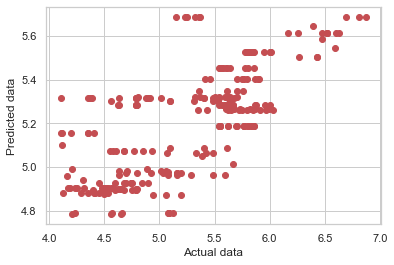

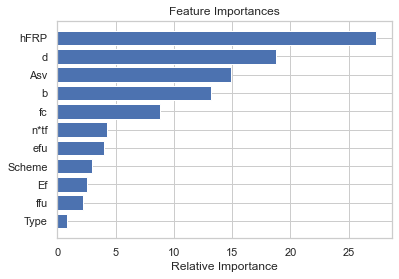

[13.1760609  18.73245023 27.34495693  2.59084346  4.04861096 14.9172995
  8.83979698  4.2733861   2.23184075  3.0071231   0.83763109]


In [30]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('CatBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('CatBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('CatBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()


features = list(X.columns.values)
importances = complex_model_1.feature_importances_
import numpy as np
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print(importances)


In [ ]:
# from sklearn.neural_network import MLPRegressor

# # ADB_model = AdaBoostRegressor(random_state=30, n_estimators=100)
# # ADB_model.fit(X_train, y_train)
# regr = MLPRegressor(random_state=1, learning_rate='adaptive', max_iter=500).fit(X_train, y_train)

# pred = regr.predict(X_test)
# rmsecm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
# rtrcm = float(format(ADB_model.score(X_train, y_train),'.3f'))
# artrcm = float(format(adjustedR2(ADB_model.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
# rtecm = float(format(ADB_model.score(X_test, y_test),'.3f'))
# artecm = float(format(adjustedR2(ADB_model.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
# cv = float(format(cross_val_score(ADB_model,X_train, y_train,cv=10).mean(),'.3f'))

# r = evaluation.shape[0]
# evaluation.loc[r] = ['ANN','All features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
# evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

In [31]:
print("For ANN regression")
from sklearn.neural_network import MLPRegressor

complex_model_1 = MLPRegressor(random_state=1, max_iter=200).fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()

r = evaluation.shape[0]
evaluation.loc[r] = ['ANN Regression-1','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

r = evaluation2.shape[0]
evaluation2.loc[r] = ['ANN','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ANN','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ANN','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ANN','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ANN','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ANN','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ANN','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ANN','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


print (evaluation2.loc[r])
print (evaluation2.loc[r+1])
print (evaluation2.loc[r+2])
print (evaluation2.loc[r+3])

print (evaluation2.loc[r+4])
print (evaluation2.loc[r+5])
print (evaluation2.loc[r+6])
print (evaluation2.loc[r+7])

For ANN regression


C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Palisa\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Model    ANN       
Test     Train RMSE
1       -0.708     
2       -0.543     
3       -0.574     
4       -0.527     
5       -0.489     
6       -0.462     
7       -0.544     
8       -0.334     
9       -0.474     
10      -0.719     
Mean    -0.537     
Name: 80, dtype: object
Model    ANN     
Test     Train R2
1       -0.7     
2        0.147   
3       -0.133   
4        0.471   
5        0.257   
6        0.265   
7        0.341   
8        0.755   
9        0.351   
10      -0.68    
Mean     0.107   
Name: 81, dtype: object
Model    ANN      
Test     Train ar2
1       -0.786    
2        0.104    
3       -0.19     
4        0.444    
5        0.22     
6        0.228    
7        0.308    
8        0.743    
9        0.318    
10      -0.764    
Mean     0.063    
Name: 82, dtype: object
Model    ANN      
Test     Train mae
1       -0.512    
2       -0.419    
3       -0.462    
4       -0.368    
5       -0.367    
6       -0.378    
7       -0.413    
8       -0.234  

In [ ]:
# # Print the predicted and actual value for the test set
# CB_y_test_prediction= regr.predict(X_test)
# np.savetxt('ANN_test_prediction.csv', CB_y_test_prediction, delimiter=',', fmt='%s')
# np.savetxt('ANN_test_actual.csv', y_test, delimiter=',', fmt='%s')




# # Print the predicted and actual value for the traing set
# CB_y_train_prediction= regr.predict(X_train)
# np.savetxt('ANN_train_prediction.csv', CB_y_train_prediction, delimiter=',', fmt='%s')
# np.savetxt('ANN_train_actual.csv', y_train, delimiter=',', fmt='%s')



# X_standardized = scaler.transform(X)
# CB_y_pred_entire_data = regr.predict(X_standardized)
# np.savetxt('ANN_entire_prediction.csv', CB_y_pred_entire_data, delimiter=',', fmt='%s')
# np.savetxt('ANN_entire_actual.csv', y, delimiter=',', fmt='%s')

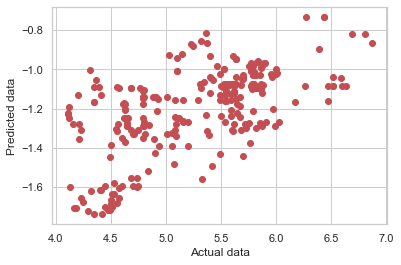

In [32]:

# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('ANN_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('ANN_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('ANN_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('ANN_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('ANN_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('ANN_entire_actual.csv', y, delimiter=',', fmt='%s')

import matplotlib.pyplot as plt
plt.plot(y, MLR_y_pred_entire_data,  'ro')
plt.ylabel('Predicted data')
plt.xlabel('Actual data')
plt.show()

# features = list(X.columns.values)
# importances = complex_model_1.coefs_
# import numpy as np
# indices = np.argsort(importances)
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

# print(importances)

In [ ]:

#equation for Linear Regression
print('Intercept: {}'.format(complex_model_1.intercept_))


AttributeError: ignored

In [ ]:
print('Coefficients: {}'.format(complex_model_1.coef_))

AttributeError: ignored

In [ ]:
evaluation.to_csv("model_results_with_cat.csv")
evaluation2.to_csv("cross_val_results_with_cat.csv")

## From the models, XGBOOST is the one having highest accuracy